<a href="https://colab.research.google.com/github/alexis1199/ESTADISTICA/blob/main/logsitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alexis1199/ESTADISTICA/refs/heads/main/smart_logistics_dataset.csv')
df.dropna(inplace=True)
df

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,2024-09-28 09:08:23,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,2024-11-09 00:48:26,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,2024-02-02 22:28:16,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2024-10-14 10:21:17,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,2024-06-13 00:29:04,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,2024-07-22 16:30:00,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,2024-04-30 04:58:58,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


In [42]:
df.drop(columns=['Timestamp'], inplace=True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


In [43]:
df['Asset_ID'].unique()

array(['Truck_6', 'Truck_9', 'Truck_2', 'Truck_10', 'Truck_8', 'Truck_3',
       'Truck_5', 'Truck_4', 'Truck_1', 'Truck_7'], dtype=object)

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Demand_Forecast ~ C(Asset_ID)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Asset_ID),9.0,5.673957e+04,6304.396170,1.770907,0.070263
Residual,727.0,2.588106e+06,3559.980922,NaN,NaN


In [45]:
df.drop(columns=['Asset_ID'], inplace=True)
df

,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


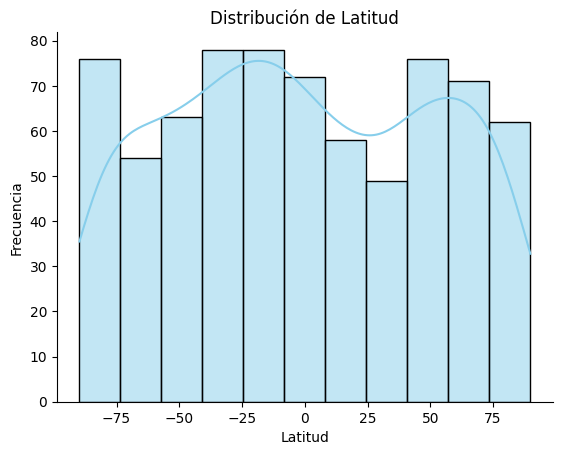

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Latitude'], kde = True, color = 'skyblue')

plt.xlabel('Latitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de Latitud')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

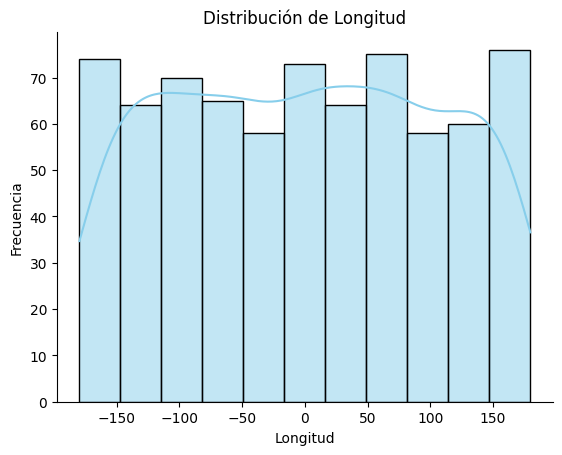

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Longitude'], kde = True, color = 'skyblue')

plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

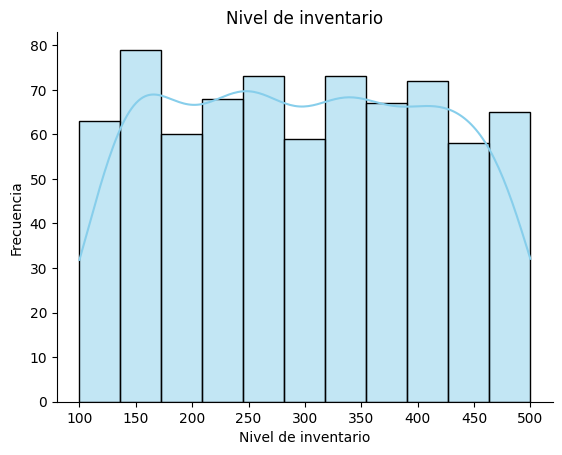

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Inventory_Level'], kde = True, color = 'skyblue')

plt.xlabel('Nivel de inventario')
plt.ylabel('Frecuencia')
plt.title('Nivel de inventario')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [49]:
df['Shipment_Status'].unique()

array(['In Transit', 'Delivered', 'Delayed'], dtype=object)

In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Demand_Forecast ~ C(Shipment_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Shipment_Status),2.0,1.475267e+03,737.633369,0.204823,0.814838
Residual,734.0,2.643370e+06,3601.322111,NaN,NaN


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2   meandiff p-adj   lower    upper  reject
------------------------------------------------------------
  Delayed  Delivered   1.8668 0.9339 -10.5781 14.3116  False
  Delayed In Transit  -1.6366 0.9521  -14.519 11.2459  False
Delivered In Transit  -3.5033 0.7991 -16.3975  9.3908  False
------------------------------------------------------------


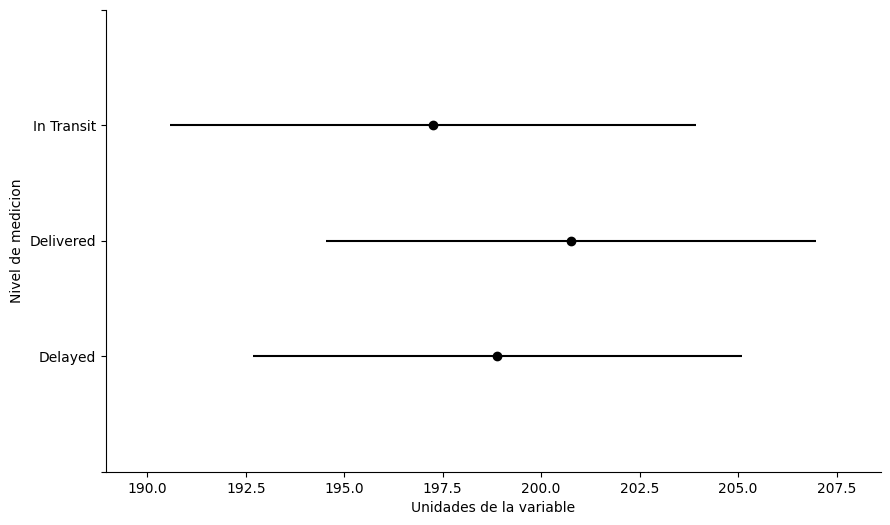

In [51]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Demand_Forecast'], groups = df['Shipment_Status'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [52]:
df.drop(columns=['Shipment_Status'], inplace=True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


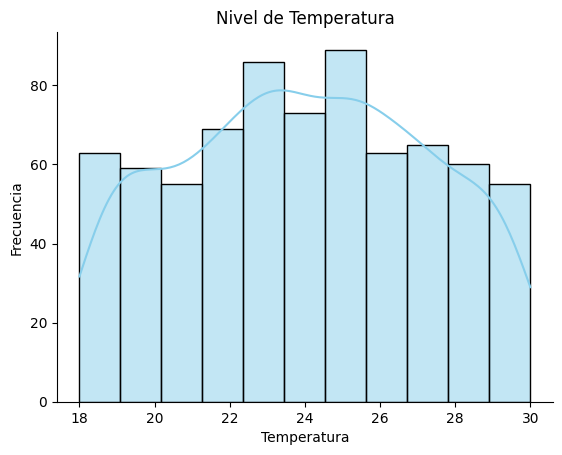

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Temperature'], kde = True, color = 'skyblue')

plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.title('Nivel de Temperatura')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

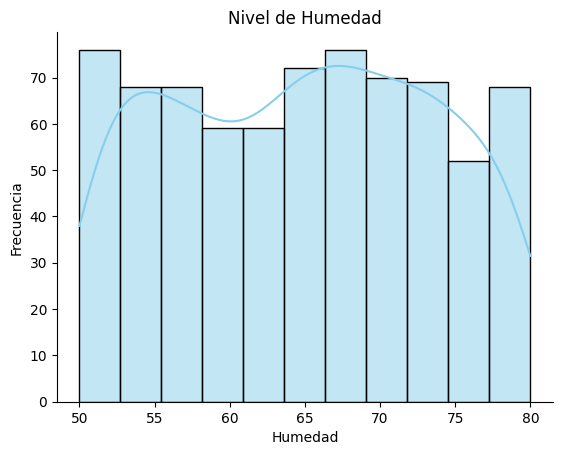

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Humidity'], kde = True, color = 'skyblue')

plt.xlabel('Humedad')
plt.ylabel('Frecuencia')
plt.title('Nivel de Humedad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [55]:
df['Traffic_Status'].unique()

array(['Heavy', 'Detour', 'Clear'], dtype=object)

In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Demand_Forecast ~ C(Traffic_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Traffic_Status),2.0,1.996710e+03,998.355010,0.277274,0.757926
Residual,734.0,2.642849e+06,3600.611698,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 Clear Detour  -3.0436 0.8403 -15.7629  9.6757  False
 Clear  Heavy  -3.8089 0.7612 -16.5153  8.8974  False
Detour  Heavy  -0.7654 0.9891 -13.4847 11.9539  False
-----------------------------------------------------


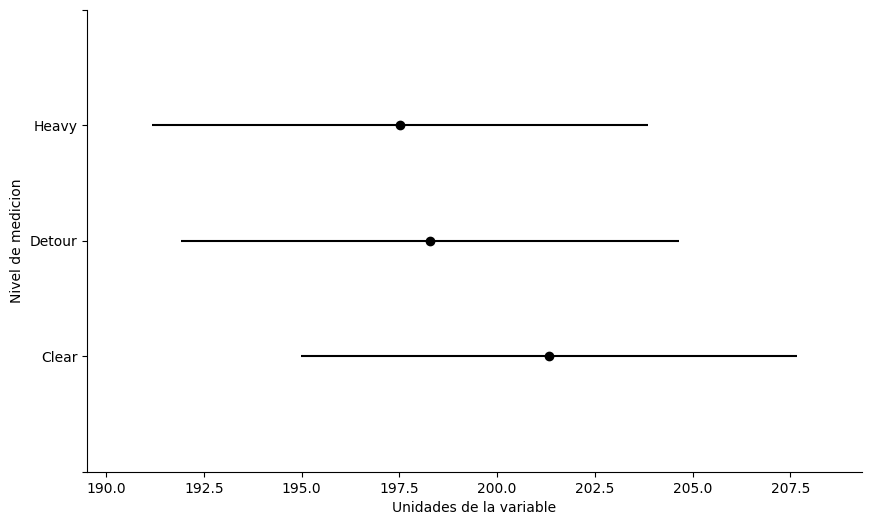

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Demand_Forecast'], groups = df['Traffic_Status'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [58]:
df.drop(columns=['Traffic_Status'], inplace=True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,Weather,83.7,272,0


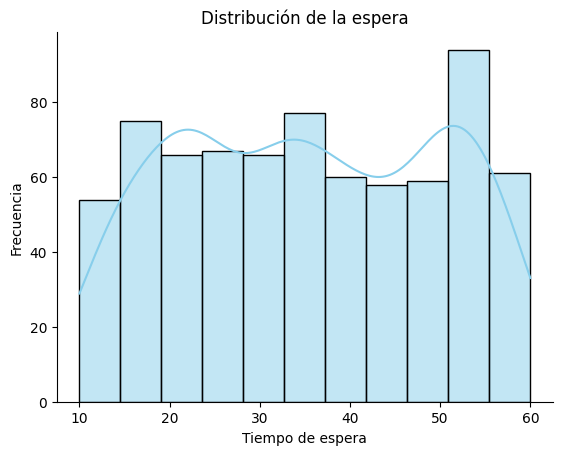

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Waiting_Time'], kde = True, color = 'skyblue')

plt.xlabel('Tiempo de espera')
plt.ylabel('Frecuencia')
plt.title('Distribución de la espera')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

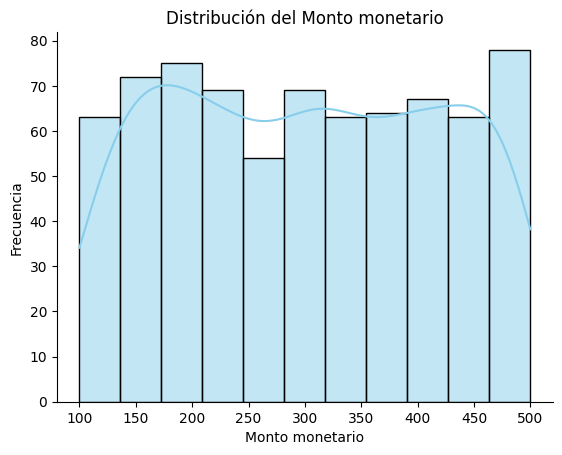

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Transaction_Amount'], kde = True, color = 'skyblue')

plt.xlabel('Monto monetario')
plt.ylabel('Frecuencia')
plt.title('Distribución del Monto monetario')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

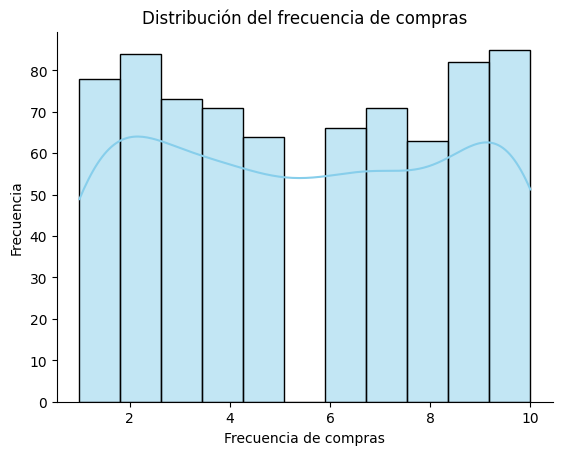

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Purchase_Frequency'], kde = True, color = 'skyblue')

plt.xlabel('Frecuencia de compras')
plt.ylabel('Frecuencia')
plt.title('Distribución del frecuencia de compras')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [62]:
df['Logistics_Delay_Reason'].unique()

array(['Weather', 'Traffic', 'Mechanical Failure'], dtype=object)

In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Demand_Forecast ~ C(Logistics_Delay_Reason)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay_Reason),2.0,4.733721e+02,236.686041,0.065697,0.93642
Residual,734.0,2.644372e+06,3602.687090,NaN,NaN


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
      group1        group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------------------
Mechanical Failure Traffic   1.8569 0.9399 -11.1473 14.8612  False
Mechanical Failure Weather   1.5654 0.9543 -11.0574 14.1881  False
           Traffic Weather  -0.2916 0.9984 -12.8858 12.3026  False
------------------------------------------------------------------


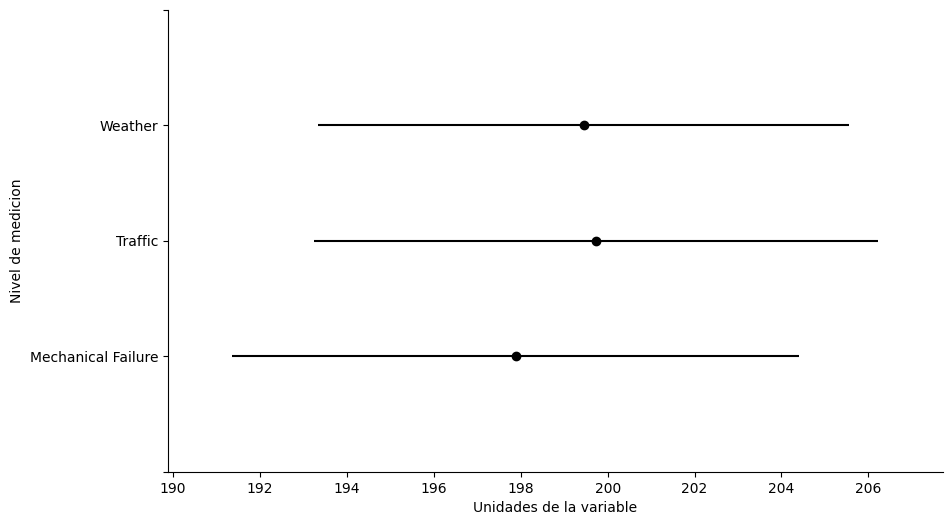

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Demand_Forecast'], groups = df['Logistics_Delay_Reason'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [65]:
df.drop(columns=['Logistics_Delay_Reason'], inplace=True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272,0


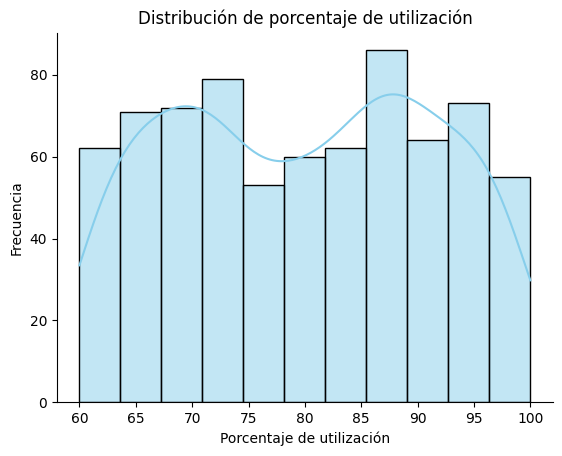

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Asset_Utilization'], kde = True, color = 'skyblue')

plt.xlabel('Porcentaje de utilización')
plt.ylabel('Frecuencia')
plt.title('Distribución de porcentaje de utilización')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

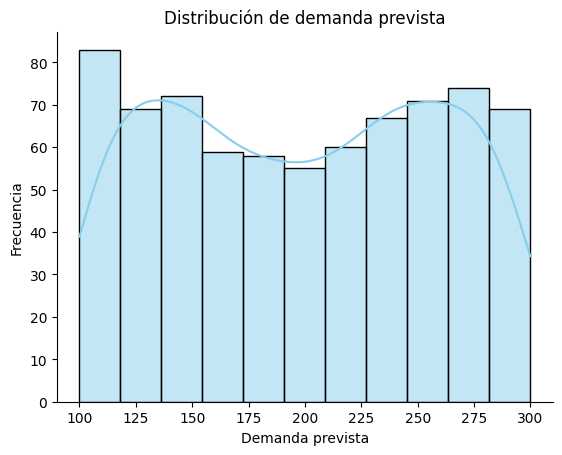

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Demand_Forecast'], kde = True, color = 'skyblue')

plt.xlabel('Demanda prevista')
plt.ylabel('Frecuencia')
plt.title('Distribución de demanda prevista')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Demand_Forecast ~ C(Logistics_Delay)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay),1.0,4.344407e+01,43.444073,0.012073,0.912536
Residual,735.0,2.644802e+06,3598.370411,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.4902 0.9125 -9.2487 8.2683  False
---------------------------------------------------


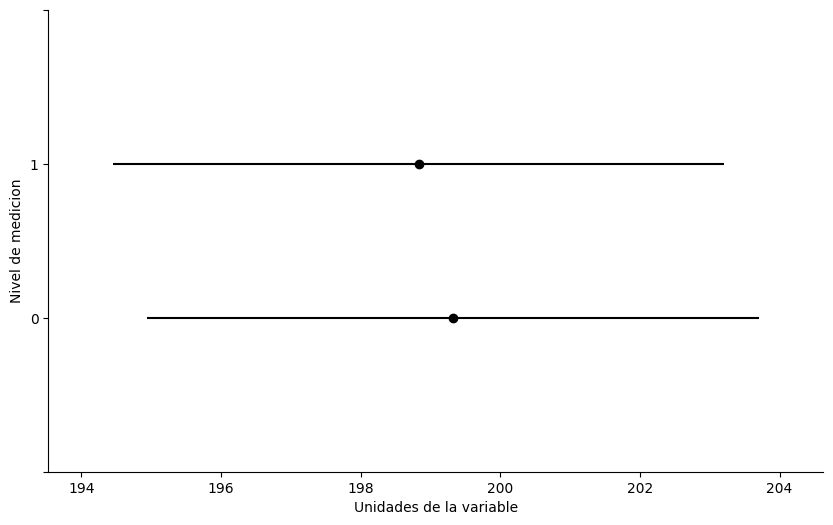

In [69]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Demand_Forecast'], groups = df['Logistics_Delay'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [70]:
df.drop(columns=['Logistics_Delay'], inplace=True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238
...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272


Text(0.5, 1.0, 'Matriz de correlacion')

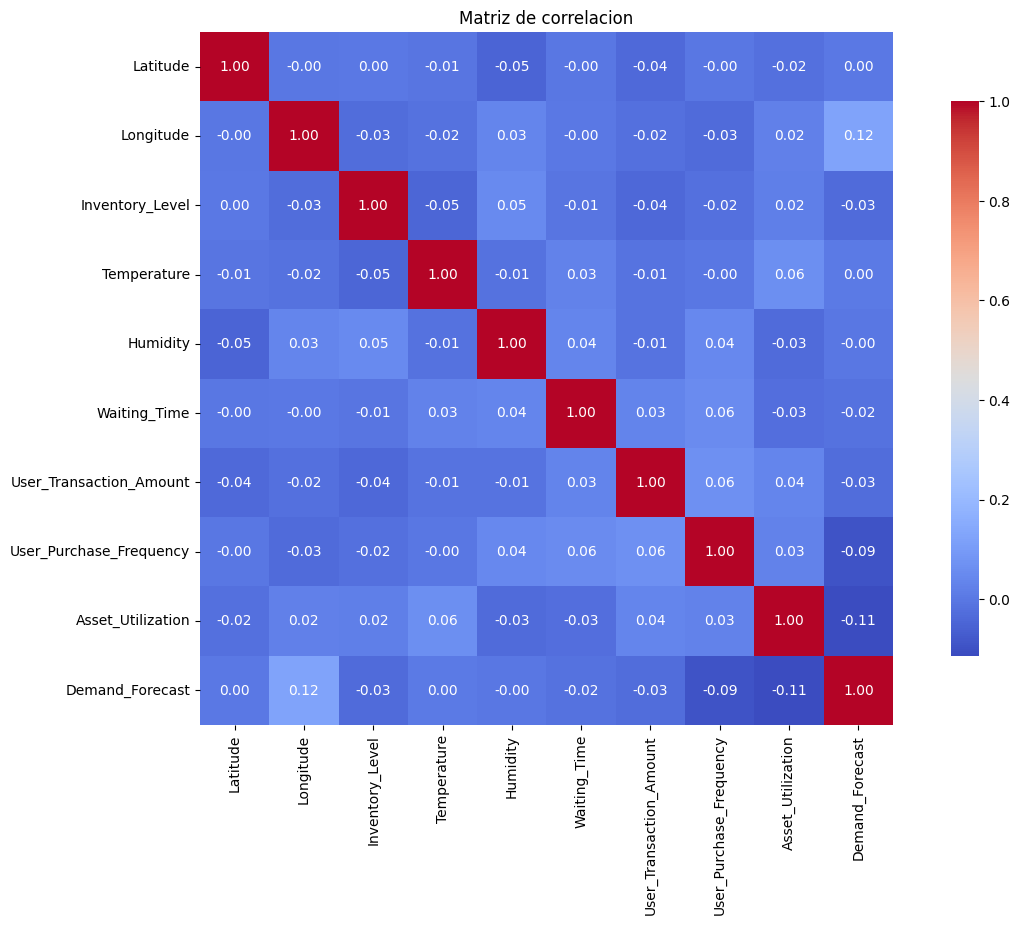

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de correlacion')

Coeficiente de determinacion:  0.0176


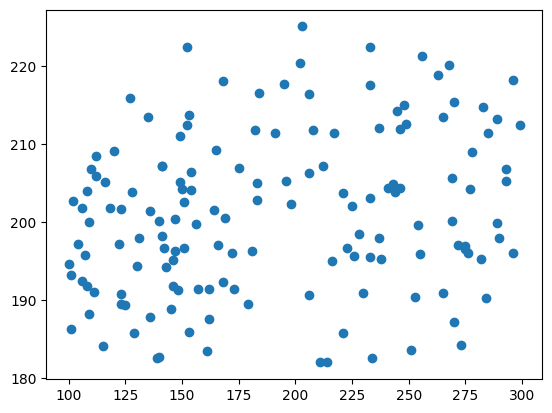

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['User_Transaction_Amount','User_Purchase_Frequency', 'Asset_Utilization', 'Longitude',]]
Y = df['Demand_Forecast']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')

In [74]:
b0, b1, b2, b3, b4 = modelo.params

Fun = lambda X1, X2, X3, X4, X5, X6 : b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4

Fun(50, 100, 150, 175, 200, 300)

82.55625737652561

In [75]:
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_train_constante)
print(f'Valor-p de Breusch-Pagan: {valor_p_bp: 0.4f}')

Valor-p de Breusch-Pagan:  0.9610


In [76]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'User_Purchase_Frequency ~ User_Transaction_Amount +  Inventory_Level +  Waiting_Time + Latitude + Asset_Utilization', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)  # ANOVA de una via
tabla_anova

,sum_sq,df,F,PR(>F)
User_Transaction_Amount,24.378126,1.0,2.748698e+00,0.097763
Inventory_Level,2.552119,1.0,2.877581e-01,0.591824
Waiting_Time,18.840329,1.0,2.124297e+00,0.145409
Latitude,0.000002,1.0,2.465960e-07,0.999604
Asset_Utilization,4.683508,1.0,5.280779e-01,0.467649
Residual,6483.218153,731.0,NaN,NaN
